In [1]:
from tensorflow import keras

In [2]:
from preprocessing_utils import PreprocessingUtils

In [3]:
from model_wrapper import ModelWrapper

In [4]:
preprocessing_utils = PreprocessingUtils()

Files already exist, skipping...
Loading images and labels...
Images and labels loaded successfully!
Preprocessing labels...
Labels preprocessed successfully!
Splitting data into train, test and validation sets...
Data split successfully!


In [5]:
def build_caffe_net(model_name: str):
    model = keras.models.Sequential(
        name=model_name,
        layers=[
            keras.layers.Conv2D(
                filters=3, kernel_size=(11, 11), activation="relu", input_shape=preprocessing_utils.images.shape[1:]
            ),
            keras.layers.MaxPooling2D(pool_size=(2, 2)),
            keras.layers.BatchNormalization(),
            keras.layers.Conv2D(
                filters=16, kernel_size=(5, 5), activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)
            ),
            keras.layers.MaxPooling2D(pool_size=(2, 2)),
            keras.layers.BatchNormalization(),
            keras.layers.Conv2D(
                filters=96, kernel_size=(3, 3), activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)
            ),
            keras.layers.MaxPooling2D(pool_size=(2, 2)),
            keras.layers.Flatten(),
            keras.layers.Dense(units=2048, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
            keras.layers.Dense(units=2048, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
            keras.layers.Dense(units=preprocessing_utils.num_classes, activation="softmax"),
        ],
    )

    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    model.summary()

    return model

In [6]:
caffe_net_wrapper = ModelWrapper("CaffeNet", preprocessing_utils=preprocessing_utils)

In [7]:
caffe_net_wrapper.build_model(build_fn=build_caffe_net, model_name=caffe_net_wrapper.model_name)

Building model...
Model: "CaffeNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 246, 246, 3)       1092      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 123, 123, 3)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 123, 123, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 16)      1216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 16)       0         
 2D)                                                             
                                        

In [8]:
caffe_net_wrapper.train_evaluate_and_save_model()

Epoch 1/100
9/9 [==============================] - 11s 254ms/step - loss: 121.7944 - accuracy: 0.0467 - val_loss: 48.3256 - val_accuracy: 0.0553
Epoch 2/100
9/9 [==============================] - 2s 198ms/step - loss: 50.3676 - accuracy: 0.0348 - val_loss: 38.5364 - val_accuracy: 0.0599
Epoch 3/100
9/9 [==============================] - 2s 167ms/step - loss: 36.1375 - accuracy: 0.0710 - val_loss: 32.4685 - val_accuracy: 0.0599
Epoch 4/100
9/9 [==============================] - 2s 168ms/step - loss: 29.9321 - accuracy: 0.1484 - val_loss: 27.6084 - val_accuracy: 0.0415
Epoch 5/100
9/9 [==============================] - 2s 167ms/step - loss: 24.6712 - accuracy: 0.1975 - val_loss: 22.7943 - val_accuracy: 0.0461
Epoch 6/100
9/9 [==============================] - 1s 165ms/step - loss: 20.3824 - accuracy: 0.2245 - val_loss: 19.9993 - val_accuracy: 0.0092
Epoch 7/100
9/9 [==============================] - 1s 166ms/step - loss: 17.0618 - accuracy: 0.2576 - val_loss: 16.4187 - val_accuracy: 0.05

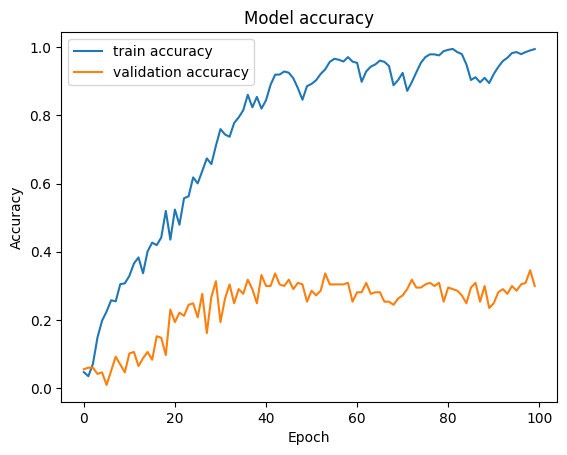

In [9]:
caffe_net_wrapper.plot_accuracy()

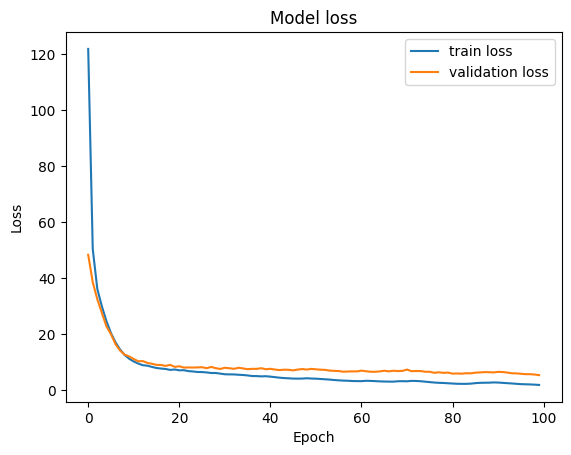

In [10]:
caffe_net_wrapper.plot_loss()

20/20 [==============================] - 0s 7ms/step


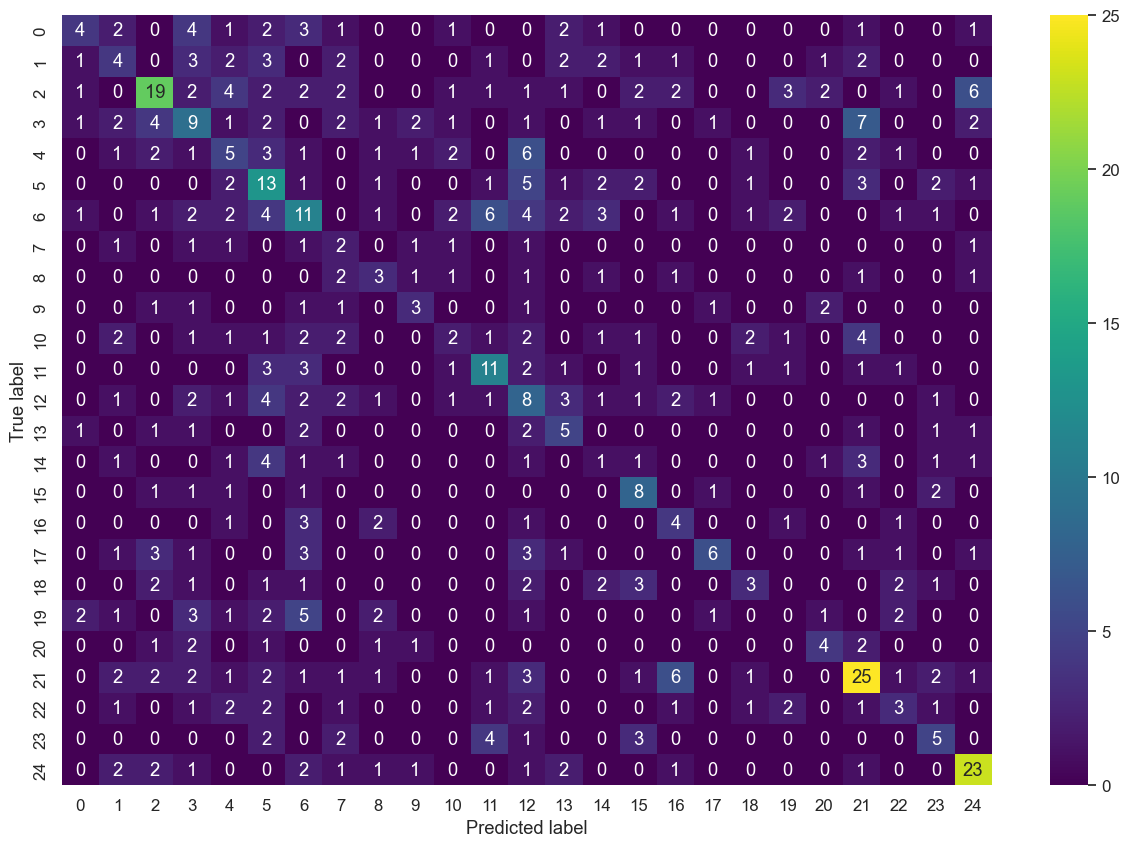

In [11]:
caffe_net_wrapper.display_confusion_matrix()